In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading datasets
train = pd.read_csv('https://mettl-arq.s3.ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2023/machine-learning/Train.csv')
test = pd.read_csv('https://mettl-arq.s3.ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2023/machine-learning/Test_x.csv')

In [4]:
train

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,price
0,2006-07-31,Stock 1,625.898686,925.086518,1550.985204,675.789905,555.931329,548.488451,251.282553,68.184030,1040831,100.000000
1,2006-08-31,Stock 1,407.387467,903.249093,1310.636561,1023.110983,1295.186240,513.446432,207.576940,42.232672,1046649,101.924169
2,2006-09-29,Stock 1,464.069891,602.668832,1066.738722,709.711673,598.719338,503.519871,133.719700,28.835722,1094158,103.166191
3,2006-10-31,Stock 1,855.854937,391.375369,1247.230306,649.979564,733.594339,596.006397,-76.881818,0.000000,1018574,104.478956
4,2006-11-30,Stock 1,453.954969,956.490566,1410.445534,1115.594551,1152.274711,965.939247,-309.204301,0.000000,1036293,104.160907
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2018-08-31,Stock 100,810.402398,953.465125,1763.867523,1014.718528,957.998121,675.953821,102.346000,21.785595,1016713,101.747952
14996,2018-09-28,Stock 100,811.620957,443.679899,1255.300856,392.059390,365.958118,815.913721,-301.200669,0.000000,1042638,102.039499
14997,2018-10-31,Stock 100,739.371050,423.172140,1162.543189,478.844995,396.603049,550.561664,227.299298,56.788344,1077825,101.126752
14998,2018-11-30,Stock 100,741.898496,286.891422,1028.789919,347.793349,358.229637,176.189978,19.405005,5.183536,1003161,102.020776


In [5]:
test

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding
0,2019-01-31,Stock 1,777.137456,411.991482,1189.128938,735.376019,834.292436,101.282767,44.303576,12.430562,1038979
1,2019-02-28,Stock 1,277.194579,499.621626,776.816206,462.172266,447.906629,119.483578,19.410210,4.298036,1033350
2,2019-03-29,Stock 1,496.436651,372.604918,869.041569,529.266640,683.167288,482.381171,-47.940167,0.000000,1093455
3,2019-04-30,Stock 1,484.533101,809.661340,1294.194441,412.770236,350.779135,570.934617,121.963652,31.066241,1047609
4,2019-05-31,Stock 1,290.520190,715.758617,1006.278807,802.761555,892.693784,277.522337,-78.316857,0.000000,1042163
...,...,...,...,...,...,...,...,...,...,...,...
4995,2022-10-31,Stock 100,408.766312,440.569040,849.335352,348.102723,312.827547,150.677789,-3.197117,0.000000,1028799
4996,2022-11-30,Stock 100,492.923805,731.542040,1224.465846,915.110188,892.471680,529.905187,148.531273,30.964416,1004215
4997,2022-12-30,Stock 100,392.331633,705.422815,1097.754448,353.436744,420.021023,963.856236,-19.214152,0.000000,1005944
4998,2023-01-31,Stock 100,273.102651,817.198302,1090.300953,787.193836,962.158503,437.654297,13.658068,3.390605,1028097


In [9]:
len(train),len(test)

(15000, 5000)

In [7]:
train.dtypes

Date                    object
Stock                   object
liabilities            float64
equity                 float64
total_assets           float64
current_assets         float64
current_liabilities    float64
total_revenue          float64
net_income             float64
dividend               float64
shares_outstanding       int64
price                  float64
dtype: object

In [8]:
train.describe()

,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,price
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000
mean,547.519819,549.476881,1096.996699,604.578098,634.164054,552.653822,0.802641,17.410165,1.050185e+06,101.401818
std,260.201093,260.453313,366.527469,264.000561,292.592581,259.456550,175.843566,25.893009,2.907637e+04,10.298443
min,100.068495,100.199767,214.814273,76.785192,74.296869,100.124239,-493.404528,0.000000,1.000003e+06,68.509892
25%,319.351022,324.739067,832.080518,406.884837,416.449707,328.253976,-109.777787,0.000000,1.024837e+06,95.737983
50%,544.731700,544.898627,1094.930216,567.370669,589.586598,555.204989,2.531044,0.620391,1.050500e+06,100.665047
75%,771.242141,775.209146,1360.909341,773.418198,810.304473,777.533156,113.132409,27.961753,1.075450e+06,106.039544
max,999.907125,999.805167,1992.436554,1556.094765,1885.219463,999.992530,499.025639,141.982375,1.099990e+06,143.008924


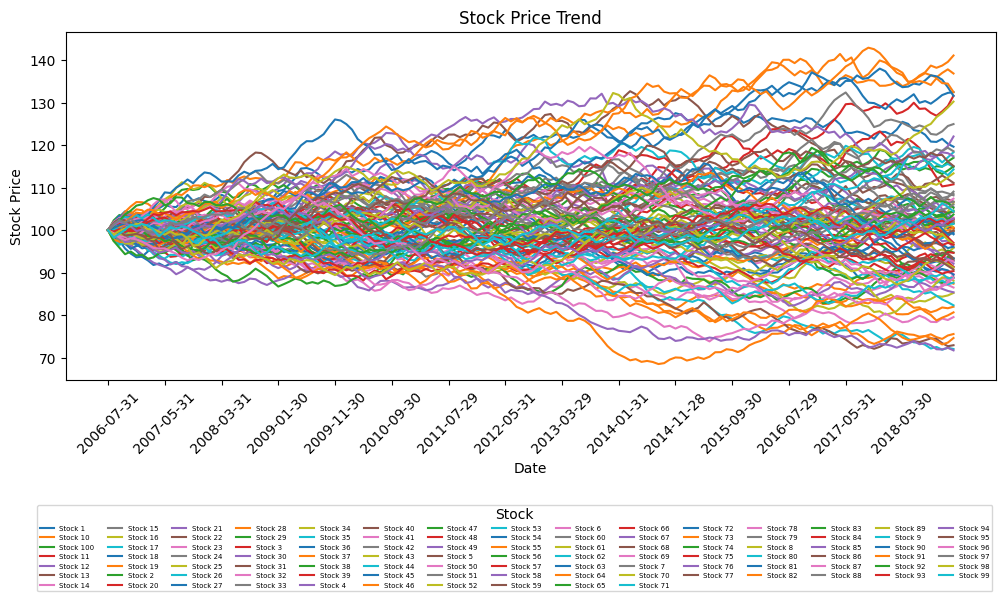

In [10]:
# Group the data by 'Stock'
grouped_data = train.groupby('Stock')

# Create subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Create a line plot for each group
for stock, group in grouped_data:
    ax.plot(group['Date'], group['price'], label='Stock ' + stock.split(' ')[-1])

# Set x-axis label and rotation
ax.set_xlabel('Date')
plt.xticks(rotation=45)

# Set y-axis label
ax.set_ylabel('Stock Price')

# Set plot title
ax.set_title('Stock Price Trend')

# Adjust legend settings
legend = ax.legend(title='Stock', fontsize='5', ncol=15)

# Move legend below the figure
legend.set_bbox_to_anchor((1, -0.35))  # Adjust the position as needed

# Show only a subset of x-axis labels
x_labels = ax.get_xticks()
x_labels_subset = x_labels[::10]  # Show every 10th label
ax.set_xticks(x_labels_subset)

# Increase bottom margin to accommodate legend
plt.subplots_adjust(bottom=0.3)

# Display the plot
plt.show()

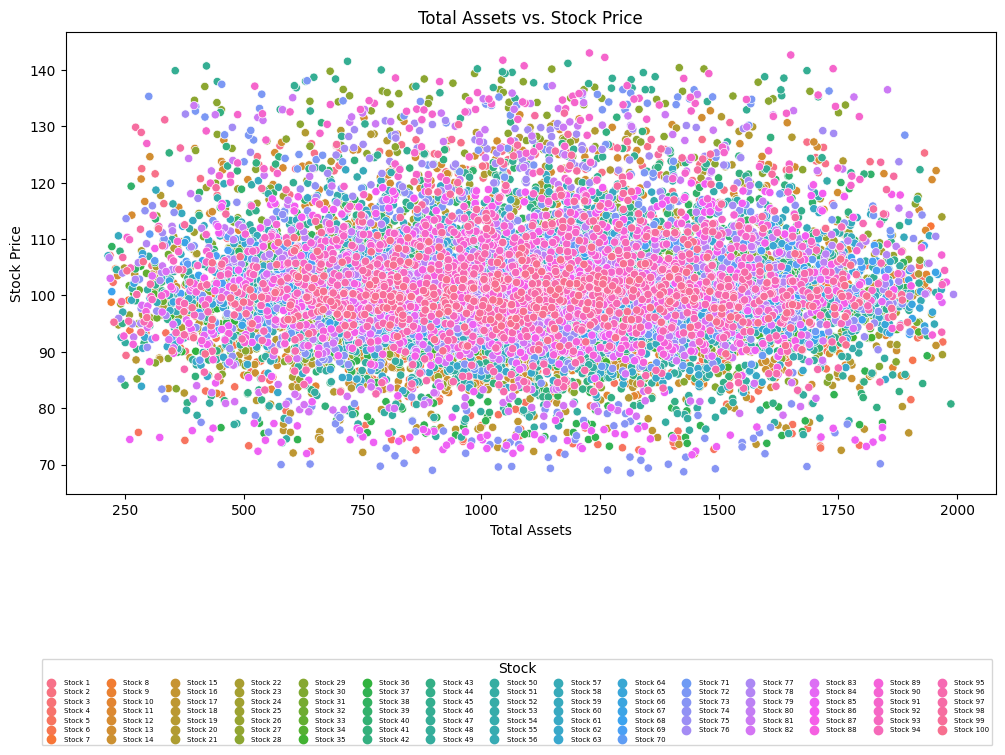

In [11]:
#Scatter plot:Total assets vs stock prices
plt.figure(figsize=(12, 6))
ax = sns.scatterplot(data=train, x='total_assets', y='price', hue='Stock')
plt.xlabel('Total Assets')
plt.ylabel('Stock Price')
plt.title('Total Assets vs. Stock Price')

#legend settings
legend = ax.legend(title='Stock', fontsize='5', ncol=15)
legend.set_bbox_to_anchor((1, -0.35))  



plt.show()

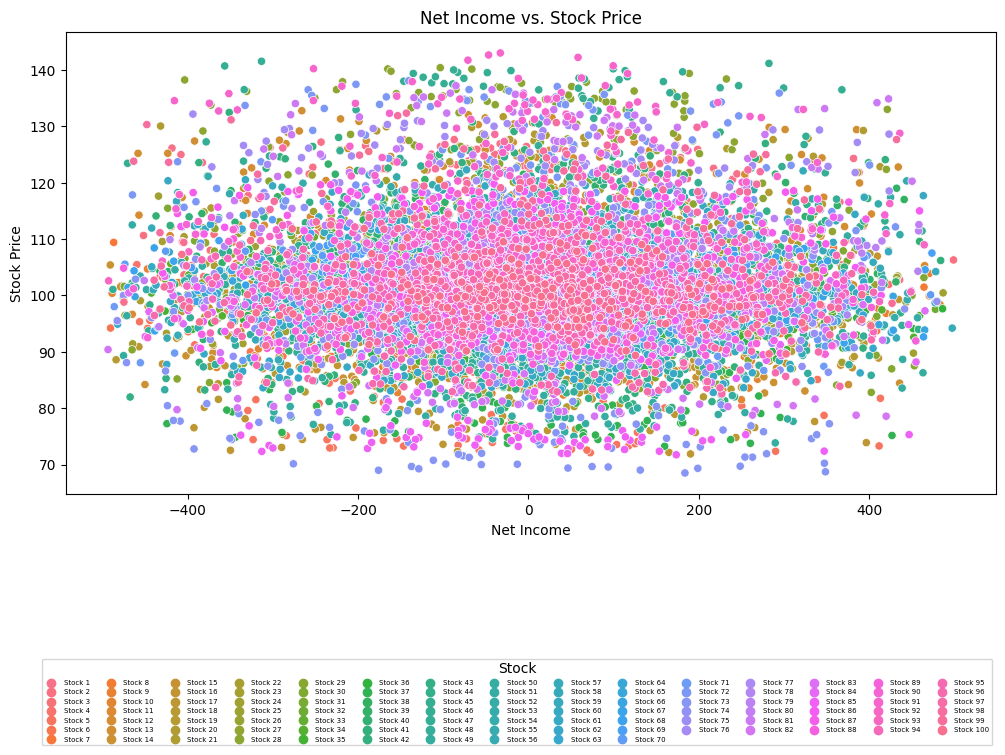

In [12]:
# Scatter plot: Net Income vs. Stock Price
plt.figure(figsize=(12, 6))
ax=sns.scatterplot(data=train, x='net_income', y='price',hue='Stock')

legend = ax.legend(title='Stock', fontsize='5', ncol=15)
legend.set_bbox_to_anchor((1, -0.35)) 

plt.xlabel('Net Income')
plt.ylabel('Stock Price')
plt.title('Net Income vs. Stock Price')
plt.show()

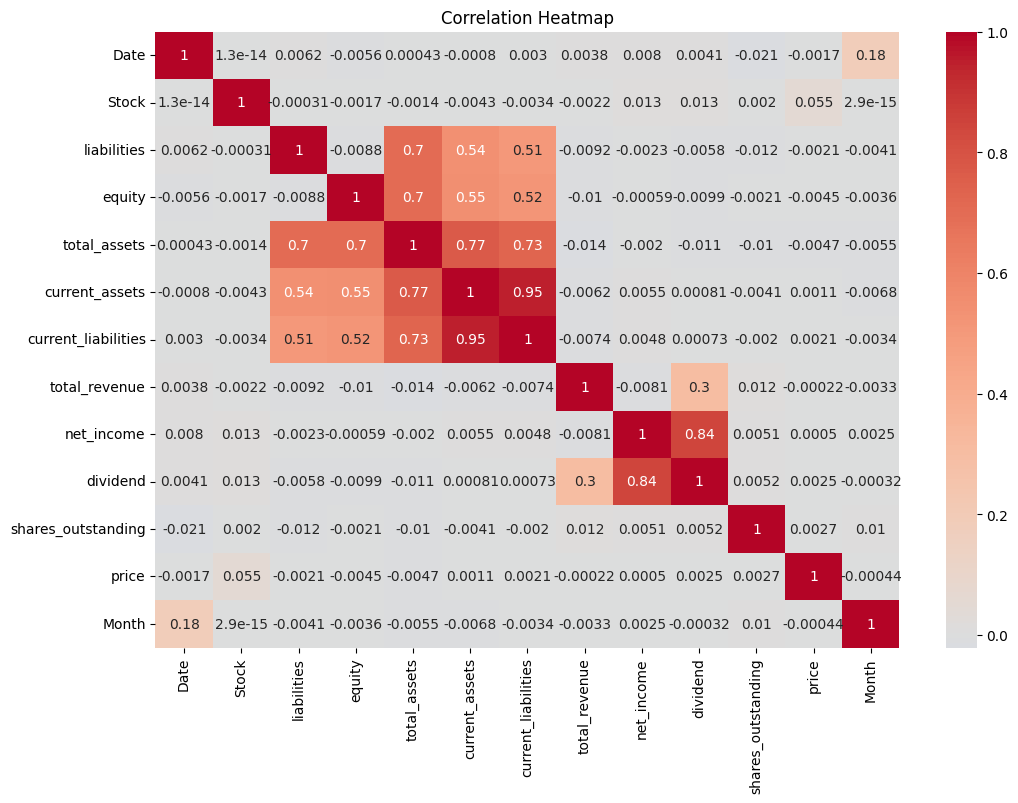

In [23]:
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

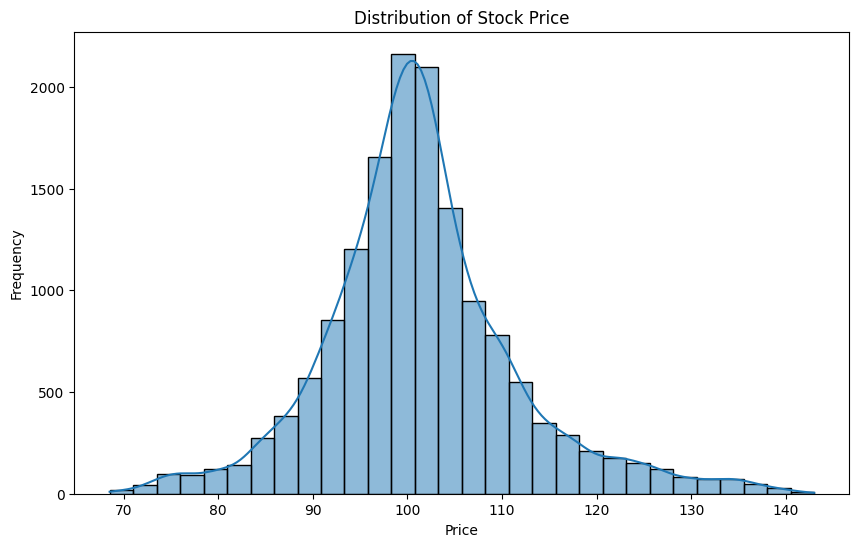

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='price', bins=30, kde=True)
plt.title('Distribution of Stock Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#almost normal distribution with little right skewed distn is observed

<Figure size 1000x600 with 0 Axes>

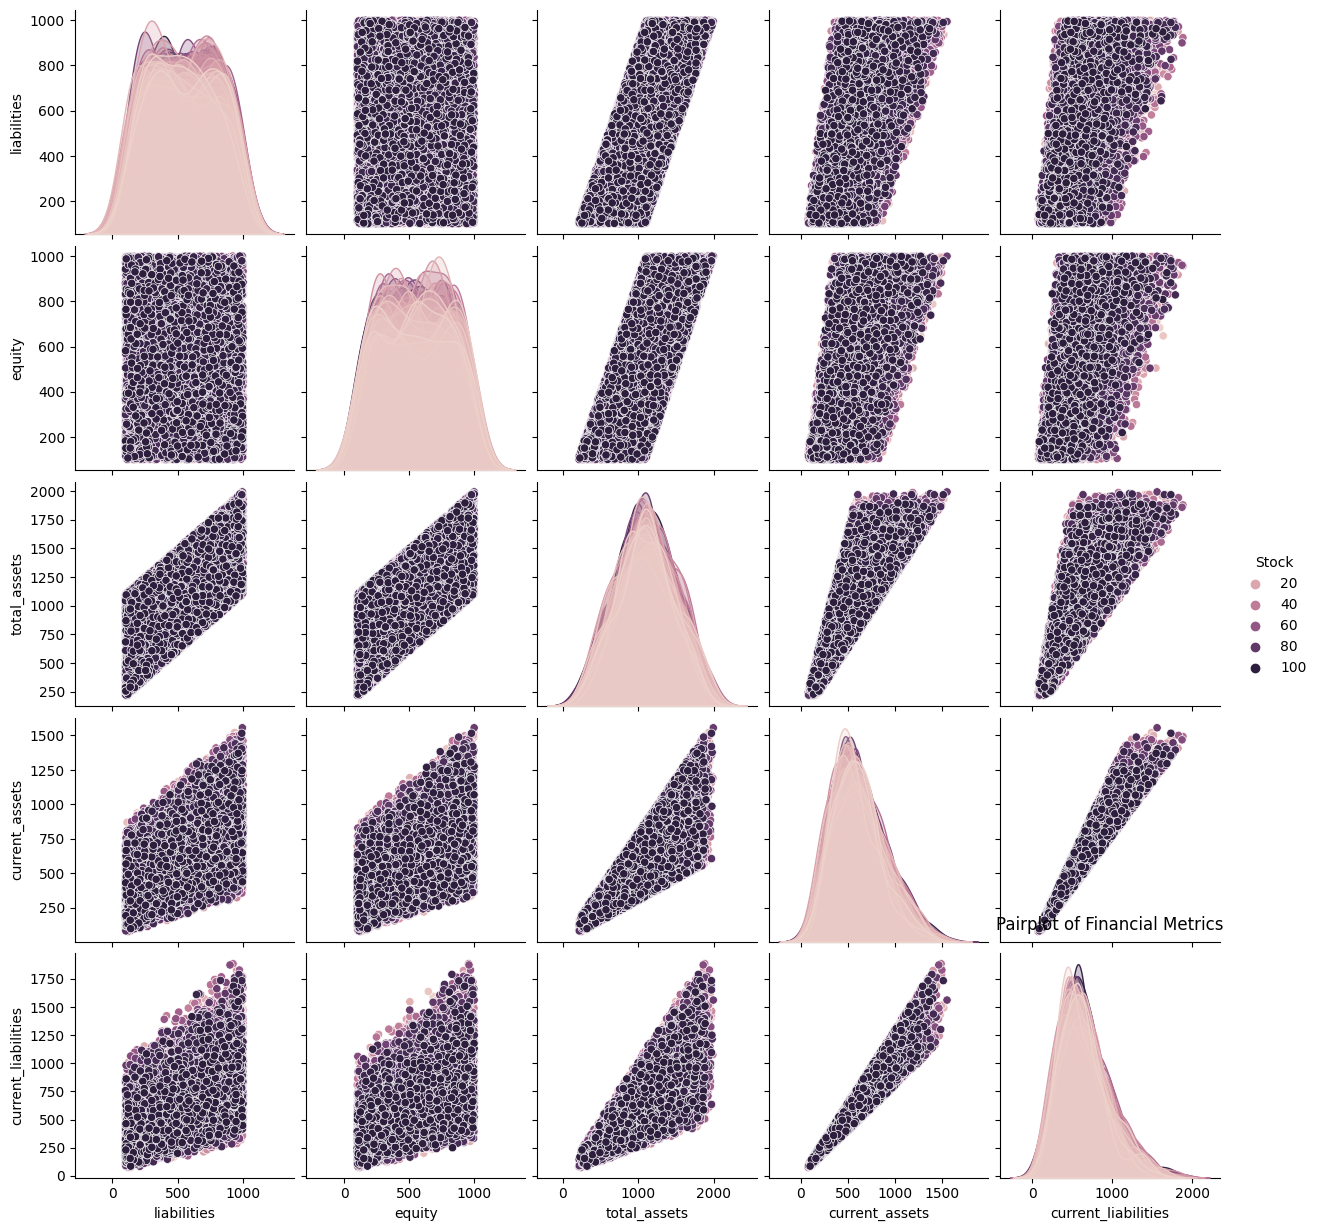

In [29]:

sns.pairplot(train, vars=['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities'],
             diag_kind='kde', hue='Stock')
plt.title('Pairplot of Financial Metrics')
plt.show()

In [13]:
train.isna().sum()

Date                   0
Stock                  0
liabilities            0
equity                 0
total_assets           0
current_assets         0
current_liabilities    0
total_revenue          0
net_income             0
dividend               0
shares_outstanding     0
price                  0
dtype: int64

In [14]:
#drop off the null values,here they are not present
train=train.dropna()

In [15]:
#split the columns to get a perfect model to train values
test['Month'] = test.apply(lambda row: int(row[0].split("-")[1]), axis = 1)
test['Date'] = test.apply(lambda row: int(row[0].split("-")[2]), axis = 1)
train['Month'] = train.apply(lambda row: int(row[0].split("-")[1]), axis = 1)
train['Date'] = train.apply(lambda row: int(row[0].split("-")[2]), axis = 1)
train['Stock'] = train.apply(lambda row: int(row[1].split(" ")[1]), axis = 1)
test['Stock'] = test.apply(lambda row: int(row[1].split(" ")[1]), axis = 1)
actual_price=train['price']
train_x = train.drop(['price'],axis=1)
train_x.head()

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,Month
0,31,1,625.898686,925.086518,1550.985204,675.789905,555.931329,548.488451,251.282553,68.184030,1040831,7
1,31,1,407.387467,903.249093,1310.636561,1023.110983,1295.186240,513.446432,207.576940,42.232672,1046649,8
2,29,1,464.069891,602.668832,1066.738722,709.711673,598.719338,503.519871,133.719700,28.835722,1094158,9
3,31,1,855.854937,391.375369,1247.230306,649.979564,733.594339,596.006397,-76.881818,0.000000,1018574,10
4,30,1,453.954969,956.490566,1410.445534,1115.594551,1152.274711,965.939247,-309.204301,0.000000,1036293,11


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split the training data into training and cross-validation sets
training_x, cv_x, training_actual_price, cv_actual_price = train_test_split(train_x, actual_price, test_size=0.2, random_state=42)


import xgboost as xgb

xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=8, random_state=42)

# Train the XGBoost model on the training set
xgb_model.fit(training_x, training_actual_price)

# Predict prices on the cross-validation set using XGBoost
cv_xgb_pred_price = xgb_model.predict(cv_x)

# Calculate MSE for XGBoost
xgb_mse = mean_squared_error(cv_actual_price, cv_xgb_pred_price)
print(f"XGBoost MSE: {xgb_mse:.2f}")







from sklearn.ensemble import GradientBoostingRegressor
# Split the training data into training and cross-validation sets
training_x, cv_x, training_actual_price, cv_actual_price = train_test_split(train_x, actual_price, test_size=0.2, random_state=42)

# Train the model on the training set
grb_model = GradientBoostingRegressor(n_estimators=100, max_depth=8)
grb_model.fit(training_x, training_actual_price)

# Predict prices on the cross-validation set using the GradientBoostingRegressor
cv_grb_pred_price = grb_model.predict(cv_x)

# Calculate MSE for GradientBoostingRegressor
grb_mse = mean_squared_error(cv_actual_price, cv_grb_pred_price)
print(f"GradientBoostingRegressor MSE: {grb_mse:.2f}")



XGBoost MSE: 46.29
GradientBoostingRegressor MSE: 43.93


In [19]:
#improvisation using advanced xgb model predictions
xgb_model = xgb.XGBRegressor(n_estimators=100, max_depth=8)
xgb_model.fit(train_x, actual_price)
pred_price = xgb_model.predict(test)
pred_pricexgb=pd.DataFrame(pred_price,columns=['Price'])




#import the GradientBoostingRegressor from scikit learn package and train and predict data

grb_model = GradientBoostingRegressor(n_estimators=100, max_depth=8)
grb_model.fit(train_x, actual_price)
pred_price = grb_model.predict(test)
pred_pricegrb=pd.DataFrame(pred_price,columns=['Price'])#predicted prices

In [21]:
#display the predicted prices
pred_pricegrb.head()
#accuracy noted:~90%.

,Price
0,119.285315
1,121.737776
2,116.051439
3,114.168229
4,115.383944


In [22]:
#improved using xgb regressor
pred_pricexgb.head()

,Price
0,119.028404
1,123.865799
2,116.444489
3,114.833229
4,122.409889
